## Problématique Métier
### Une entreprise souhaite analyser la répartition des performances des employés pour comprendre les écarts.
## Objectif 
### Étudier les distributions des scores de performance détecter les facteurs d'amélioration. 

## DATASET
### https://www.kaggle.com/datasets/rhuebner/human-resources-data-set


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("human_resource.csv")

In [4]:
df.head(10) #afficher les 10 premiers enregistrements

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
5,"Anderson, Linda",10002,0,0,0,1,5,4,0,57568,...,Amy Dunn,11.0,LinkedIn,Exceeds,5.00,5,0,1/7/2019,0,15
6,"Andreola, Colby",10194,0,0,0,1,4,3,0,95660,...,Alex Sweetwater,10.0,LinkedIn,Fully Meets,3.04,3,4,1/2/2019,0,19
7,"Athwal, Sam",10062,0,4,1,1,5,3,0,59365,...,Ketsia Liebig,19.0,Employee Referral,Fully Meets,5.00,4,0,2/25/2019,0,19
8,"Bachiochi, Linda",10114,0,0,0,3,5,3,1,47837,...,Brannon Miller,12.0,Diversity Job Fair,Fully Meets,4.46,3,0,1/25/2019,0,4
9,"Bacong, Alejandro",10250,0,2,1,1,3,3,0,50178,...,Peter Monroe,7.0,Indeed,Fully Meets,5.00,5,6,2/18/2019,0,16


 ### Aperçu du nombre de lignes et de colonnes

In [6]:
df.shape 

(311, 36)

### Nétoyage et Transformation des données

- Suppression des colonnes inutiles

In [9]:

df = df.drop([
    'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 
    'PerfScoreID', 'FromDiversityJobFairID', 'Termd', 'PositionID', 'Zip', 
    'CitizenDesc', 'HispanicLatino', 'RaceDesc', 'DateofHire', 'TermReason', 'ManagerID',
    'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30'
], axis=1)


In [10]:
df.head(10) #afficher les 10 premiers enregistrements

,Employee_Name,EmpID,Salary,Position,State,DOB,Sex,MaritalDesc,DateofTermination,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,Absences
0,"Adinolfi, Wilson K",10026,62506,Production Technician I,MA,07/10/83,M,Single,NaN,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,1
1,"Ait Sidi, Karthikeyan",10084,104437,Sr. DBA,MA,05/05/75,M,Married,6/16/2016,Voluntarily Terminated,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,17
2,"Akinkuolie, Sarah",10196,64955,Production Technician II,MA,09/19/88,F,Married,9/24/2012,Voluntarily Terminated,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,3
3,"Alagbe,Trina",10088,64991,Production Technician I,MA,09/27/88,F,Married,NaN,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,15
4,"Anderson, Carol",10069,50825,Production Technician I,MA,09/08/89,F,Divorced,9/6/2016,Voluntarily Terminated,Production,Webster Butler,Google Search,Fully Meets,5.00,4,2
5,"Anderson, Linda",10002,57568,Production Technician I,MA,05/22/77,F,Single,NaN,Active,Production,Amy Dunn,LinkedIn,Exceeds,5.00,5,15
6,"Andreola, Colby",10194,95660,Software Engineer,MA,05/24/79,F,Single,NaN,Active,Software Engineering,Alex Sweetwater,LinkedIn,Fully Meets,3.04,3,19
7,"Athwal, Sam",10062,59365,Production Technician I,MA,02/18/83,M,Widowed,NaN,Active,Production,Ketsia Liebig,Employee Referral,Fully Meets,5.00,4,19
8,"Bachiochi, Linda",10114,47837,Production Technician I,MA,02/11/70,F,Single,NaN,Active,Production,Brannon Miller,Diversity Job Fair,Fully Meets,4.46,3,4
9,"Bacong, Alejandro",10250,50178,IT Support,MA,01/07/88,M,Divorced,NaN,Active,IT/IS,Peter Monroe,Indeed,Fully Meets,5.00,5,16


- Sélectionner les employés qui sont encore en service

In [12]:
df = df[df["DateofTermination"].isna()] 

- rétitrer la virgule entre les noms

In [14]:
df['Employee_Name'] = df['Employee_Name'].str.replace(",","") 

- créer une colonne pour récupérer l'année de naissance des employés

In [16]:
df['Year_of_birth'] = df['DOB'].str.split('/').str.get(2) 

- convertir en entier

In [18]:
df['Year_of_birth'] = df['Year_of_birth'].astype(int) 

- reformater, passer de 78 à 1978

In [20]:
df['Year_of_birth'] = df['Year_of_birth'] + 1900 

- créer une colonne pour catégoriser les employés par age

In [22]:
df['age_bracket'] = df['Year_of_birth'].apply(lambda x: 'Young' if 2025 - x < 41
                                              else 'Middle Age' if 40 < 2025 - x <= 50 
                                              else 'Old') 

In [23]:
df = df.drop([
    'Year_of_birth','DateofTermination'
], axis=1)

In [24]:
df['age_bracket']

0      Middle Age
3           Young
5      Middle Age
6      Middle Age
7      Middle Age
          ...    
305         Young
306         Young
308    Middle Age
309    Middle Age
310    Middle Age
Name: age_bracket, Length: 207, dtype: object

In [25]:
df.head(10)

,Employee_Name,EmpID,Salary,Position,State,DOB,Sex,MaritalDesc,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,Absences,age_bracket
0,Adinolfi Wilson K,10026,62506,Production Technician I,MA,07/10/83,M,Single,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,1,Middle Age
3,AlagbeTrina,10088,64991,Production Technician I,MA,09/27/88,F,Married,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,15,Young
5,Anderson Linda,10002,57568,Production Technician I,MA,05/22/77,F,Single,Active,Production,Amy Dunn,LinkedIn,Exceeds,5.00,5,15,Middle Age
6,Andreola Colby,10194,95660,Software Engineer,MA,05/24/79,F,Single,Active,Software Engineering,Alex Sweetwater,LinkedIn,Fully Meets,3.04,3,19,Middle Age
7,Athwal Sam,10062,59365,Production Technician I,MA,02/18/83,M,Widowed,Active,Production,Ketsia Liebig,Employee Referral,Fully Meets,5.00,4,19,Middle Age
8,Bachiochi Linda,10114,47837,Production Technician I,MA,02/11/70,F,Single,Active,Production,Brannon Miller,Diversity Job Fair,Fully Meets,4.46,3,4,Old
9,Bacong Alejandro,10250,50178,IT Support,MA,01/07/88,M,Divorced,Active,IT/IS,Peter Monroe,Indeed,Fully Meets,5.00,5,16,Young
12,Barbossa Hector,10012,92328,Data Analyst,TX,07/04/88,M,Divorced,Active,IT/IS,Simon Roup,Diversity Job Fair,Exceeds,4.28,4,9,Young
13,Barone Francesco A,10265,58709,Production Technician I,MA,07/20/83,M,Single,Active,Production,Kelley Spirea,Google Search,Fully Meets,4.60,4,7,Middle Age
16,Beak Kimberly,10023,70131,Production Technician II,MA,04/17/66,F,Married,Active,Production,Kelley Spirea,Employee Referral,Exceeds,4.40,3,16,Old


- Catégoriser en fontion des salaires

In [27]:
bins = [45000, 70000, 100000, 150000, 200000, 250000]
labels = ['Low', 'Lower-Medium', 'Medium', 'Upper-Medium', 'High'] # ['Bas', 'Moyen-bas', 'Moyen', 'Moyen-haut', 'Élevé'] 


df['salary_category'] = pd.cut(df['Salary'], bins=bins, labels=labels, include_lowest=True) 

- Covertissons performance score en valeur numérique 

In [29]:
score_mapping = {
    "Pip": 1,
    "Needs Improvement": 2,
    "Fully Meets": 3,
    "Exceeds": 4
}


# Appliquer la conversion
df["PerformanceScoreNumeric"] = df["PerformanceScore"].map(score_mapping) 


In [30]:
df

,Employee_Name,EmpID,Salary,Position,State,DOB,Sex,MaritalDesc,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,Absences,age_bracket,salary_category,PerformanceScoreNumeric
0,Adinolfi Wilson K,10026,62506,Production Technician I,MA,07/10/83,M,Single,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,1,Middle Age,Low,4.0
3,AlagbeTrina,10088,64991,Production Technician I,MA,09/27/88,F,Married,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,15,Young,Low,3.0
5,Anderson Linda,10002,57568,Production Technician I,MA,05/22/77,F,Single,Active,Production,Amy Dunn,LinkedIn,Exceeds,5.00,5,15,Middle Age,Low,4.0
6,Andreola Colby,10194,95660,Software Engineer,MA,05/24/79,F,Single,Active,Software Engineering,Alex Sweetwater,LinkedIn,Fully Meets,3.04,3,19,Middle Age,Lower-Medium,3.0
7,Athwal Sam,10062,59365,Production Technician I,MA,02/18/83,M,Widowed,Active,Production,Ketsia Liebig,Employee Referral,Fully Meets,5.00,4,19,Middle Age,Low,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,Wolk Hang T,10174,60446,Production Technician II,MA,04/20/85,F,Single,Active,Production,David Stanley,LinkedIn,Fully Meets,3.40,4,14,Young,Low,3.0
306,Woodson Jason,10135,65893,Production Technician II,MA,05/11/85,M,Single,Active,Production,Kissy Sullivan,LinkedIn,Fully Meets,4.07,4,13,Young,Low,3.0
308,Zamora Jennifer,10010,220450,CIO,MA,08/30/79,F,Single,Active,IT/IS,Janet King,Employee Referral,Exceeds,4.60,5,16,Middle Age,High,4.0
309,Zhou Julia,10043,89292,Data Analyst,MA,02/24/79,F,Single,Active,IT/IS,Simon Roup,Employee Referral,Fully Meets,5.00,3,11,Middle Age,Lower-Medium,3.0


In [31]:
df[df.duplicated() == True] #montrer les doublons

,Employee_Name,EmpID,Salary,Position,State,DOB,Sex,MaritalDesc,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,Absences,age_bracket,salary_category,PerformanceScoreNumeric


In [32]:
df.shape

(207, 19)

In [33]:
df.dtypes

Employee_Name                object
EmpID                         int64
Salary                        int64
Position                     object
State                        object
DOB                          object
Sex                          object
MaritalDesc                  object
EmploymentStatus             object
Department                   object
ManagerName                  object
RecruitmentSource            object
PerformanceScore             object
EngagementSurvey            float64
EmpSatisfaction               int64
Absences                      int64
age_bracket                  object
salary_category            category
PerformanceScoreNumeric     float64
dtype: object

- Changeons le type des données

In [35]:

df = df.astype({
    'Employee_Name': 'category',
    'Position': 'category',
    'State': 'category',
    'Sex': 'category',
    'Department': 'category',
    'age_bracket': 'category',
    'salary_category': 'category',
    'RecruitmentSource': 'category'
})

df.dtypes

Employee_Name              category
EmpID                         int64
Salary                        int64
Position                   category
State                      category
DOB                          object
Sex                        category
MaritalDesc                  object
EmploymentStatus             object
Department                 category
ManagerName                  object
RecruitmentSource          category
PerformanceScore             object
EngagementSurvey            float64
EmpSatisfaction               int64
Absences                      int64
age_bracket                category
salary_category            category
PerformanceScoreNumeric     float64
dtype: object

In [36]:
df.reset_index(drop = True ) #réorganiser les index

,Employee_Name,EmpID,Salary,Position,State,DOB,Sex,MaritalDesc,EmploymentStatus,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,Absences,age_bracket,salary_category,PerformanceScoreNumeric
0,Adinolfi Wilson K,10026,62506,Production Technician I,MA,07/10/83,M,Single,Active,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,1,Middle Age,Low,4.0
1,AlagbeTrina,10088,64991,Production Technician I,MA,09/27/88,F,Married,Active,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,15,Young,Low,3.0
2,Anderson Linda,10002,57568,Production Technician I,MA,05/22/77,F,Single,Active,Production,Amy Dunn,LinkedIn,Exceeds,5.00,5,15,Middle Age,Low,4.0
3,Andreola Colby,10194,95660,Software Engineer,MA,05/24/79,F,Single,Active,Software Engineering,Alex Sweetwater,LinkedIn,Fully Meets,3.04,3,19,Middle Age,Lower-Medium,3.0
4,Athwal Sam,10062,59365,Production Technician I,MA,02/18/83,M,Widowed,Active,Production,Ketsia Liebig,Employee Referral,Fully Meets,5.00,4,19,Middle Age,Low,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,Wolk Hang T,10174,60446,Production Technician II,MA,04/20/85,F,Single,Active,Production,David Stanley,LinkedIn,Fully Meets,3.40,4,14,Young,Low,3.0
203,Woodson Jason,10135,65893,Production Technician II,MA,05/11/85,M,Single,Active,Production,Kissy Sullivan,LinkedIn,Fully Meets,4.07,4,13,Young,Low,3.0
204,Zamora Jennifer,10010,220450,CIO,MA,08/30/79,F,Single,Active,IT/IS,Janet King,Employee Referral,Exceeds,4.60,5,16,Middle Age,High,4.0
205,Zhou Julia,10043,89292,Data Analyst,MA,02/24/79,F,Single,Active,IT/IS,Simon Roup,Employee Referral,Fully Meets,5.00,3,11,Middle Age,Lower-Medium,3.0


## Analyse des tendances

### 1. Performance par département

In [39]:
df.groupby(['Department'])['PerformanceScoreNumeric'].agg(['count','mean','std']).sort_values('mean', ascending = False)

C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\2175778340.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Department'])['PerformanceScoreNumeric'].agg(['count','mean','std']).sort_values('mean', ascending = False)


,count,mean,std
Department,,,
Software Engineering,7,3.142857,0.377964
IT/IS,39,3.128205,0.409074
Production,122,3.114754,0.448997
Sales,23,3.043478,0.366589
Admin Offices,7,3.000000,0.000000
Executive Office,1,3.000000,NaN


 Nous constatons que le département le mieux noté est le département **Software Engineering**  
 mais que les notes sont plus homogène dans le département **Admin Offices**	

C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\3513926682.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  department_mean_performance = df.groupby('Department')['PerformanceScoreNumeric'].mean().reset_index()
C:\Users\jeff\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Score de performance moyen')

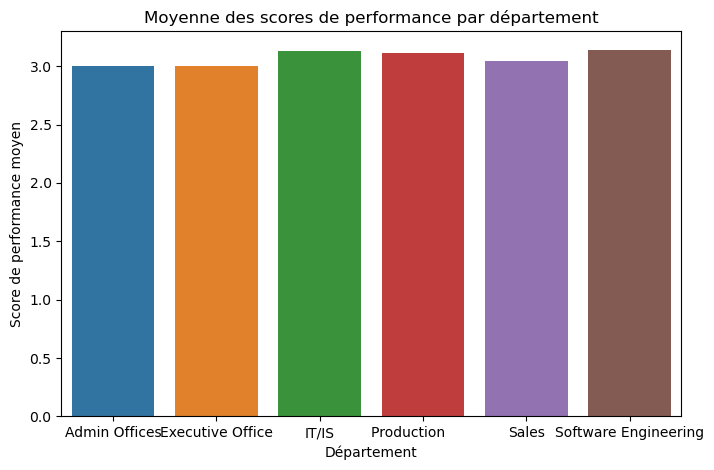

In [41]:
department_mean_performance = df.groupby('Department')['PerformanceScoreNumeric'].mean().reset_index()

# Visualisation avec seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Department', y='PerformanceScoreNumeric', data=department_mean_performance)
plt.title('Moyenne des scores de performance par département')
plt.xlabel('Département')
plt.ylabel('Score de performance moyen')



### 2. La croissance des salaire assure une meilleure performance?

In [43]:
df.groupby(['salary_category'])['PerformanceScoreNumeric'].agg(['count','mean','std']).sort_values('mean', ascending = False)

C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\944450699.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['salary_category'])['PerformanceScoreNumeric'].agg(['count','mean','std']).sort_values('mean', ascending = False)


,count,mean,std
salary_category,,,
High,2,3.500000,0.707107
Upper-Medium,5,3.200000,0.836660
Lower-Medium,46,3.173913,0.437384
Medium,9,3.111111,0.333333
Low,137,3.072993,0.395471


C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\3552776288.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  salary_mean_performance = df.groupby('salary_category')['PerformanceScoreNumeric'].mean().reset_index()


Text(0.5, 1.0, 'Moyenne des scores de performance en fonction des salaires')

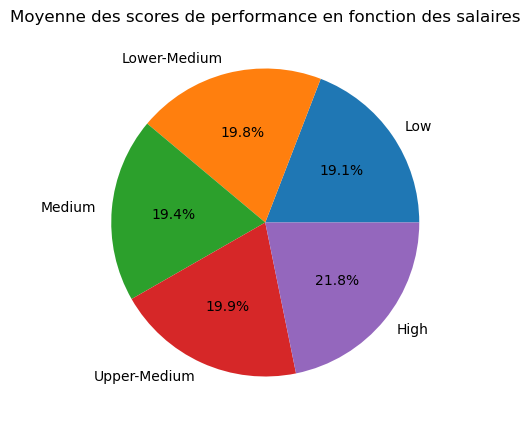

In [44]:
salary_mean_performance = df.groupby('salary_category')['PerformanceScoreNumeric'].mean().reset_index()

# Visualisation avec seaborn
plt.figure(figsize=(8, 5))
plt.pie(salary_mean_performance['PerformanceScoreNumeric'],  labels=salary_mean_performance['salary_category'],autopct='%1.1f%%')
plt.title('Moyenne des scores de performance en fonction des salaires')



Les 2 meilleures catégories salariales(**High** et **Upper-Medium**) ont les meilleures performances,  
la plus petite catégorie(**Low**) a les performance la moin bonne 
**Medium** est une catégories plus aisé que **Lower-Medium** mais les scores de performances ne sont  
pas reflétés de la même façon
Nous pouvons dire qu' un bon salaire a quand même une influence positive sur les performances


### 3. Âge et Performance

In [47]:
df.groupby(['age_bracket'])['PerformanceScoreNumeric'].agg(['count','mean','std']).sort_values('mean', ascending = False)

C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\3604730389.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['age_bracket'])['PerformanceScoreNumeric'].agg(['count','mean','std']).sort_values('mean', ascending = False)


,count,mean,std
age_bracket,,,
Old,51,3.176471,0.433861
Middle Age,85,3.094118,0.453125
Young,63,3.063492,0.353463


C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\1931340102.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_mean_performance = df.groupby('age_bracket')['PerformanceScoreNumeric'].mean().reset_index()


Text(0.5, 1.0, "Moyenne des scores de performance en fonction de l'âge ")

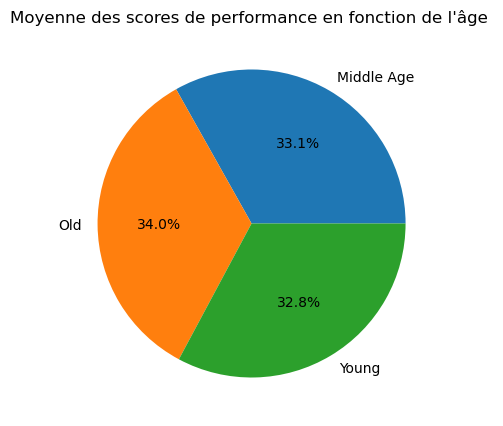

In [48]:
age_mean_performance = df.groupby('age_bracket')['PerformanceScoreNumeric'].mean().reset_index()

# Visualisation avec seaborn
plt.figure(figsize=(8, 5))
plt.pie(age_mean_performance['PerformanceScoreNumeric'],  labels=age_mean_performance['age_bracket'],autopct='%1.1f%%')
plt.title("Moyenne des scores de performance en fonction de l'âge ")



Les employés les plus âgés ont de meilleures performances. Cela peut être traduit par le fait que plus on a de l'expérience  
plus on est performant. Bien surque cela ne pourrait être une certitude parce que l'expérience n'est pas toujours associée  
à l'âge 

### 4. Top 5 des postes les plus performants
Nous sélectionnnerons uniquement les postes qui ont minimum 6 employés

In [51]:
df.groupby(['Position'])['PerformanceScoreNumeric'].agg(['count','mean']).sort_values('mean', ascending = False).query('count>5').head(5)

C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\4149779912.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Position'])['PerformanceScoreNumeric'].agg(['count','mean']).sort_values('mean', ascending = False).query('count>5').head(5)


,count,mean
Position,,
Data Analyst,6,3.333333
Production Technician II,30,3.166667
Software Engineer,6,3.166667
IT Support,8,3.125000
Production Manager,9,3.111111


### 4. Top 5 des meilleures sources de recrutements
Le paramètre  de comparaison ici sera la moyenne des performances des employés provenant de la sorurce

In [53]:
df.groupby(['RecruitmentSource'])['PerformanceScoreNumeric'].agg(['count','mean']).sort_values('mean', ascending = False).head(5)

C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\3269059136.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['RecruitmentSource'])['PerformanceScoreNumeric'].agg(['count','mean']).sort_values('mean', ascending = False).head(5)


,count,mean
RecruitmentSource,,
Employee Referral,26,3.192308
Indeed,61,3.163934
Website,10,3.100000
Diversity Job Fair,13,3.076923
LinkedIn,57,3.070175


### 5. Un employé satisfait est-il plus performants?

### Classement des performances :

1. **Pip** (Plan d'Amélioration de la Performance)  
   - **Score : 1**  
   - Cela représente la performance la plus faible, nécessitant une intervention sérieuse.

2. **Needs Improvement** (Nécessite une amélioration)  
   - **Score : 2**  
   - La performance nécessite des améliorations, mais n'est pas encore au niveau acceptable.

3. **Fully Meets** (Répond complètement)  
   - **Score : 3**  
   - Cela indique que l'employé atteint les attentes minimales de manière satisfaisante.

4. **Exceeds** (Dépasse)  
   - **Score : 4**  
   - La performance dépasse les attentes et est supérieure à la norme attendue.


Text(0, 0.5, 'Performance')

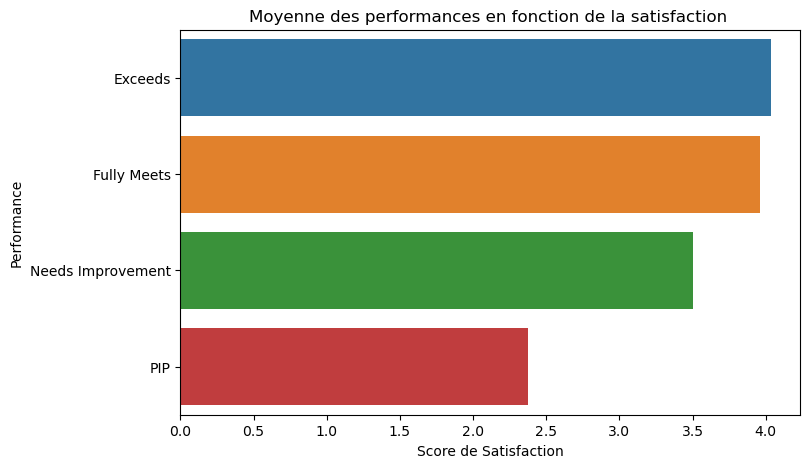

In [56]:
age_mean_performance = df.groupby('PerformanceScore')['EmpSatisfaction'].mean().reset_index()
plt.figure(figsize=(8, 5))
sns.barplot(y='PerformanceScore', x='EmpSatisfaction', data=age_mean_performance)
plt.title('Moyenne des performances en fonction de la satisfaction ')
plt.xlabel('Score de Satisfaction')
plt.ylabel('Performance')

Le graphique nous montre que la performance des employés évolue  
de la même façon que le score de satisfaction.

### 6. relation entre les absences et la performance

In [59]:
df[['PerformanceScoreNumeric', 'Absences']].corr()

,PerformanceScoreNumeric,Absences
PerformanceScoreNumeric,1.000000,0.011333
Absences,0.011333,1.000000


la correlation entre ces 2 colonnes est de 0.011333 ce qui est très proche  
de 0 donc il n'y a  pas de réelle relation entre les absences et la performance

### 7. Performance par Genre

In [62]:
df.groupby(['Sex'])['PerformanceScoreNumeric'].agg(['count','mean','std']).sort_values('mean', ascending = False)

C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\3546597140.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['Sex'])['PerformanceScoreNumeric'].agg(['count','mean','std']).sort_values('mean', ascending = False)


,count,mean,std
Sex,,,
F,113,3.106195,0.408893
M,86,3.104651,0.434648


C:\Users\jeff\AppData\Local\Temp\ipykernel_13756\1482915713.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_mean_performance = df.groupby('Sex')['PerformanceScoreNumeric'].mean().reset_index()
C:\Users\jeff\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


Text(0, 0.5, 'Score de performance moyen')

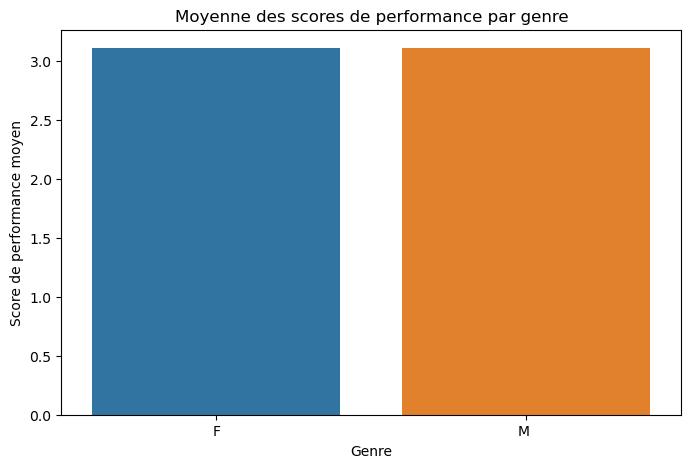

In [63]:
gender_mean_performance = df.groupby('Sex')['PerformanceScoreNumeric'].mean().reset_index()

# Visualisation avec seaborn
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='PerformanceScoreNumeric', data=gender_mean_performance)
plt.title('Moyenne des scores de performance par genre')
plt.xlabel('Genre')
plt.ylabel('Score de performance moyen')



Les hommes et les femmes ont quasiment les mêmes moyennes de performances

## Conclusion

Après analyse, nous recommandons à l'entreprise les actions suivantes pour optimiser ses performances : prioriser le recrutement de nouveaux talents avec davantage d'expérience à partir des 5 meilleures sources de recrutement identifiées, réévaluer les salaires, et mettre en œuvre des initiatives ciblées visant à accroître le taux de satisfaction des employés. Ces mesures permettront de renforcer la productivité.